In [2]:
### Calculate new infer
from vdsm_util import get_blob_client, get_blobnames
from io import BytesIO, StringIO
from pyproj import Transformer
import pickle as pkl
import numpy as np

import time
import datetime
from dateutil.relativedelta import relativedelta
from azure.storage.blob import BlobServiceClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from azureml.core.run import Run
import scipy
import xarray as xr

import random
from sklearn.metrics import r2_score, accuracy_score
from azureml.core import Workspace
from azureml.core.authentication import MsiAuthentication
msi_auth = MsiAuthentication()

ws = Workspace(subscription_id="7704663e-8944-4300-b951-6462d41ab638", # put in .json
resource_group="arg-rt-pacedev-SpaceTech", # also in .json
workspace_name="aml-WS-spacetech001", # also
auth=msi_auth
)

keyvault = ws.get_default_keyvault()
conn_str = keyvault.get_secret("asartpacedevstvdsm001-connstr")

In [ ]:
# import xarray as xr


In [ ]:
# ## online run
# # run = Run.get_context()
# # conn_str = run.get_secret("asartpacedevstvdsm001-connstr")
# random_select = 20000
# veg_type = 'pv'
# f_year = '2021'
# f_prev_month = '01'
# month_model = 3
# last_col_name = f'pred_{month_model}mon'
# f_truth_month = 4  # to delta
# f_truth_year = 2021 # to delta
# infer_csvfolder = f'scoringoutput_csv/{f_year}/{f_prev_month}/pred{month_model}_{veg_type}.csv'



In [ ]:
# infer_csvfolder

In [ ]:
# blob_client = get_blob_client(filename=infer_csvfolder, conn_str=conn_str)
# df_infer = pd.read_csv(StringIO(blob_client.download_blob().content_as_text()))
# blob_client = BlobServiceClient.from_connection_string(conn_str)
# container_client = blob_client.get_container_client("data")

# # blob_names = list(container_client.list_blobs(name_starts_with=f'{f_truth_year}/{int(f_truth_month):02d}/fused/{veg_type}_v1/'))
# blob_names = container_client.list_blobs(name_starts_with=f'{f_truth_year}/{int(f_truth_month):02d}/fused/{veg_type}_v1/')

# truth_df = pd.DataFrame()
# for blob_name in blob_names:  ## to do random selection instead
#     blob_client = get_blob_client(filename=blob_name, conn_str=conn_str)
#     df = pd.read_csv(StringIO(blob_client.download_blob().content_as_text()))
#     truth_df = truth_df.append(df)

# random_df_truth = truth_df.sample(n=random_select, replace=False)
# random_df_truth_compare = random_df_truth[['filename', 'lat', 'lon', 'evi']]
# df_infer_compare = df_infer[['chainage_name', 'latitude', 'longitude', last_col_name]]


In [ ]:
# df_infer_compare = df_infer_compare.rename(columns={'chainage_name':'filename', 'latitude':'lat', 'longitude':'lon'})
# df_infer_compare.head()


In [ ]:
# # df_join_inner = random_df_truth_compare.merge(df_infer_compare, suffixes=("_truth", "_infer"), how='outer', on=['filename','lat', 'lon'], indicator=True)
# df_join_inner = random_df_truth_compare.merge(df_infer_compare, suffixes=("_truth", "_infer"), how='outer', right_on=['chainage_name','latitude', 'longitude'],
#                                                     left_on=['filename','lat', 'lon'], indicator=True)

In [ ]:
df_join_inner.head()

In [ ]:
# random_select = 16000
# veg_type = 'pv'
# f_year = '2021'
# f_prev_month = '01'

# fig, ax = plt.subplots(3,3, figsize=(10,10))

# i=0
# # for month_model in [3, 6]:
# for month_model in [3]:
#     for veg_type in ['pv']:

#     # for veg_type in ['pv', 'npv', 'bs']:
#         last_col_name = f'pred_{month_model}mon'
#         if month_model == 3:
#             f_truth_month = 4  # to delta
#             f_truth_year = 2021 # to delta
#         if month_model == 6:
#             f_truth_month = 7  # to delta
#             f_truth_year = 2021
#         if month_model == 12:
#             f_truth_month = 1  # to delta
#             f_truth_year = 2022
#         infer_csvfolder = f'scoringoutput_csv/{f_year}/{f_prev_month}/pred{month_model}_{veg_type}.csv'

#         blob_client = get_blob_client(filename=infer_csvfolder, conn_str=conn_str)
#         df_infer = pd.read_csv(StringIO(blob_client.download_blob().content_as_text()))
#         df_infer.info()
        
#         blob_client = BlobServiceClient.from_connection_string(conn_str)
#         container_client = blob_client.get_container_client("data")
#         blob_names = container_client.list_blobs(name_starts_with=f'{f_truth_year}/{int(f_truth_month):02d}/fused/{veg_type}_v1/')
#         # blob_names = container_client.list_blobs(name_starts_with=f'{f_truth_year}/{int(f_truth_month):02d}/staging/')

#         truth_df = pd.DataFrame()
#         for blob_name in blob_names:  ## to do random selection instead
#             blob_client = get_blob_client(filename=blob_name, conn_str=conn_str)
#             df = pd.read_csv(StringIO(blob_client.download_blob().content_as_text()))
#             truth_df = truth_df.append(df)

In [ ]:
# truth_df.info()

In [ ]:
# random_df_truth = truth_df   #.sample(n=random_select, replace=False)
# random_df_truth_compare = random_df_truth.loc[:, ['filename', 'lat', 'lon', 'evi']]
# df_infer_compare = df_infer.loc[:, ['chainage_name', 'latitude', 'longitude', last_col_name]]

# df_infer_compare.rename(columns={'chainage_name':'filename', 'latitude':'lat', 'longitude':'lon'}, inplace=True)
# df_infer_compare['lat'] = df_infer_compare['lat'].astype('object')
# df_infer_compare['lon'] = df_infer_compare['lon'].astype('object')


In [ ]:
# random_df_truth_compare['lat'] = random_df_truth_compare['lat'].astype('object')
# random_df_truth_compare['lon'] = random_df_truth_compare['lon'].astype('object')
# random_df_truth_compare.info()

In [ ]:
# df_join_inner = pd.merge(left=random_df_truth_compare, 
#                             right=df_infer_compare, how='inner', 
#                                             left_on=['filename','lat', 'lon'], 
#                                             right_on = ['filename','lat', 'lon'], 
#                                             copy=True, indicator=True,
#                                             suffixes=('_truth', '_infer'))




In [ ]:
# df_join_inner.head()

In [ ]:
# df_join_inner_clean = df_join_inner.dropna()
# df_join_inner_clean.info()

In [ ]:
# print('---------')
# ### Bin EVI values into 4 bands to mimic PCI
# # bins = [0, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.55, 0.6]
# bins = [0, 0.2, 0.4, 0.6, 0.8]  

# names2 = list(range(len(bins)-1))
# df_join_inner_clean['pred_band'] = pd.cut(df_join_inner_clean[last_col_name], bins, labels=names2)
# df_join_inner_clean['actual_band'] = pd.cut(df_join_inner_clean['evi'], bins, labels=names2)


In [ ]:
# df_join_inner_clean.head()

# y_pred = df_join_inner_clean['pred_band'].astype('int')
# y_true = df_join_inner_clean['actual_band'].astype('int')

In [ ]:

# # cond = y_pred['pred_band'] > 0
# # acc =  accuracy_score(y_true[cond], y_pred[cond])
# cond = (y_pred > 0) & (y_true > 0)
# acc =  accuracy_score(y_true[cond], y_pred[cond])
# print("Acc: " + veg_type + " " + str(month_model) + " months: " + f'{acc:.2f}')

# r2 = r2_score(df_join_inner_clean['evi'], df_join_inner_clean[last_col_name])
# print("R2: "  + veg_type + " " + str(month_model) + " months: " +  f'{r2:.2f}')

In [4]:
df_join_inner

filename      lat      lon       evi  pred_12mon _merge
0      BM; TP; YA_251_251.csv -22.4274  117.697  0.157436    0.302700   both
1      BM; TP; YA_251_251.csv -22.4272  117.695  0.102272    0.161219   both
2      BM; TP; YA_251_251.csv -22.4331  117.695  0.133106    0.184447   both
3      BM; TP; YA_251_251.csv  -22.429  117.697  0.163372    0.226381   both
4      BM; TP; YA_251_251.csv  -22.425  117.695  0.110345    0.188890   both
...                       ...      ...      ...       ...         ...    ...
20408          YA_447_449.csv  -22.787  119.186  0.090447    0.186764   both
20409          YA_447_449.csv -22.7792   119.19  0.108504    0.224912   both
20410          YA_447_449.csv  -22.786  119.194  0.162484    0.273664   both
20411          YA_447_449.csv -22.7833  119.189  0.082413    0.220082   both
20412          YA_447_449.csv -22.7865  119.191  0.131731    0.265529   both

[20413 rows x 6 columns]

In [1]:
random_select = 16000
veg_type = 'pv'
f_year = '2020'
f_prev_month = '08'

i=0
# for month_model in [3,6,12]:
month_model=6
veg_type='pv'

    # for veg_type in ['pv']:
if month_model == 3:
    f_truth_month = 11  # to delta
    f_truth_year = 2020 # to delta
if month_model == 6:
    f_truth_month = 2  # to delta
    f_truth_year = 2021
if month_model == 12:
    f_truth_month = 8  # to delta
    f_truth_year = 2021

blob_client = BlobServiceClient.from_connection_string(conn_str)
container_client = blob_client.get_container_client("data")
# blob_names = container_client.list_blobs(name_starts_with=f'{f_truth_year}/{int(f_truth_month):02d}/fused/{veg_type}_v1/')
blob_names = container_client.list_blobs(name_starts_with=f'{f_truth_year}/{int(f_truth_month):02d}/staging/')

truth_df = pd.DataFrame()
for blob_name in blob_names:  ## to do random selection instead
    blob_client = get_blob_client(filename=blob_name, conn_str=conn_str)
    # df = pd.read_csv(StringIO(blob_client.download_blob().content_as_text()))
    # truth_df = truth_df.append(df)
    unpickled_ds = pkl.loads(blob_client.download_blob().content_as_bytes())
    unpickled_ds['evi'] = 2.5*((unpickled_ds.nbart_nir_1 - unpickled_ds.nbart_red) / (unpickled_ds.nbart_nir_1 + 6*unpickled_ds.nbart_red - 7.5*unpickled_ds.nbart_blue +1))
    da = xr.DataArray(coords={'y' : unpickled_ds['y'], 'x' : unpickled_ds['x']}, data=np.nanmean(unpickled_ds['evi'].values.clip(-1.5, 1.5), axis=0))
    da_df = da.to_dataframe(name='evi').dropna()
    da_df.reset_index(inplace=True)
    da_df.drop_duplicates(subset=['y','x'], keep='first', inplace=True)
    transformer = Transformer.from_crs("EPSG:3577", "EPSG:4326")
    y_4326, x_4326 = transformer.transform(da_df.x.values, da_df.y.values)
    da_df['lat'] = y_4326
    da_df['lon'] = x_4326
    da_df['filename'] = blob_name['name'].split('/')[3][:-7] + '.csv'
    da_df.drop(columns = ['y', 'x'], inplace=True)
    truth_df = truth_df.append(da_df)

# for veg_type in ['pv', 'npv', 'bs']:
last_col_name = f'pred_{month_model}mon'
infer_csvfolder = f'scoringoutput_csv/{f_year}/{f_prev_month}/pred{month_model}_{veg_type}.csv'

blob_client = get_blob_client(filename=infer_csvfolder, conn_str=conn_str)
df_infer = pd.read_csv(StringIO(blob_client.download_blob().content_as_text()))

random_df_truth = truth_df   #.sample(n=random_select, replace=False)
random_df_truth_compare = random_df_truth.loc[:, ['filename', 'lat', 'lon', 'evi']]
df_infer_compare = df_infer.loc[:, ['chainage_name', 'latitude', 'longitude', last_col_name]]

df_infer_compare.rename(columns={'chainage_name':'filename', 'latitude':'lat', 'longitude':'lon'}, inplace=True)
# df_infer_compare['lat'] = df_infer_compare['lat'].astype('object')
# df_infer_compare['lon'] = df_infer_compare['lon'].astype('object')

# random_df_truth_compare['lat'] = random_df_truth_compare['lat'].astype('object')
# random_df_truth_compare['lon'] = random_df_truth_compare['lon'].astype('object')

df_infer_compare['lat'] = (df_infer_compare['lat']*1000000).astype('int')
df_infer_compare['lon'] = (df_infer_compare['lon']*1000000).astype('int')

random_df_truth_compare['lat'] = (random_df_truth_compare['lat']*1000000).astype('int')
random_df_truth_compare['lon'] = (random_df_truth_compare['lon']*1000000).astype('int')

df_join_inner = pd.merge(left=random_df_truth_compare, 
                            right=df_infer_compare, how='inner', 
                                            left_on=['filename','lat', 'lon'], 
                                            right_on = ['filename','lat', 'lon'], 
                                            copy=True, indicator=True,
                                            suffixes=('_truth', '_infer'))

# df_join_inner = df_join_inner[~df_join_inner['filename'].str.startswith('YA')]
df_join_inner_clean = df_join_inner.dropna()
# print(df_join_inner_clean)

print('---------')
### Bin EVI values into 4 bands to mimic PCI
# bins = [0, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.55, 0.6]
bins = [0, 0.2, 0.4, 0.6, 0.8]  

names2 = list(range(len(bins)-1))
df_join_inner_clean['pred_band'] = pd.cut(df_join_inner_clean[last_col_name], bins, labels=names2)
df_join_inner_clean['actual_band'] = pd.cut(df_join_inner_clean['evi'], bins, labels=names2)

# print(df_join_inner_clean)
# df_join_inner_clean = df_join_inner_clean.dropna()
# print(df_join_inner_clean.shape)


NameError: name 'BlobServiceClient' is not defined

/tmp/ipykernel_32137/2613460050.py:21: RuntimeWarning: Mean of empty slice
  da = xr.DataArray(coords={'y' : unpickled_ds['y'], 'x' : unpickled_ds['x']}, data=np.nanmean(unpickled_ds['evi'].values.clip(-1.5, 1.5), axis=0))


1 2020
2 2020
3 2020
4 2020
5 2020
6 2020
7 2020
8 2020
9 2020
10 2020
11 2020
12 2020
1 2021
2 2021
3 2021
4 2021
5 2021
6 2021
7 2021
8 2021
9 2021
10 2021
11 2021
12 2021


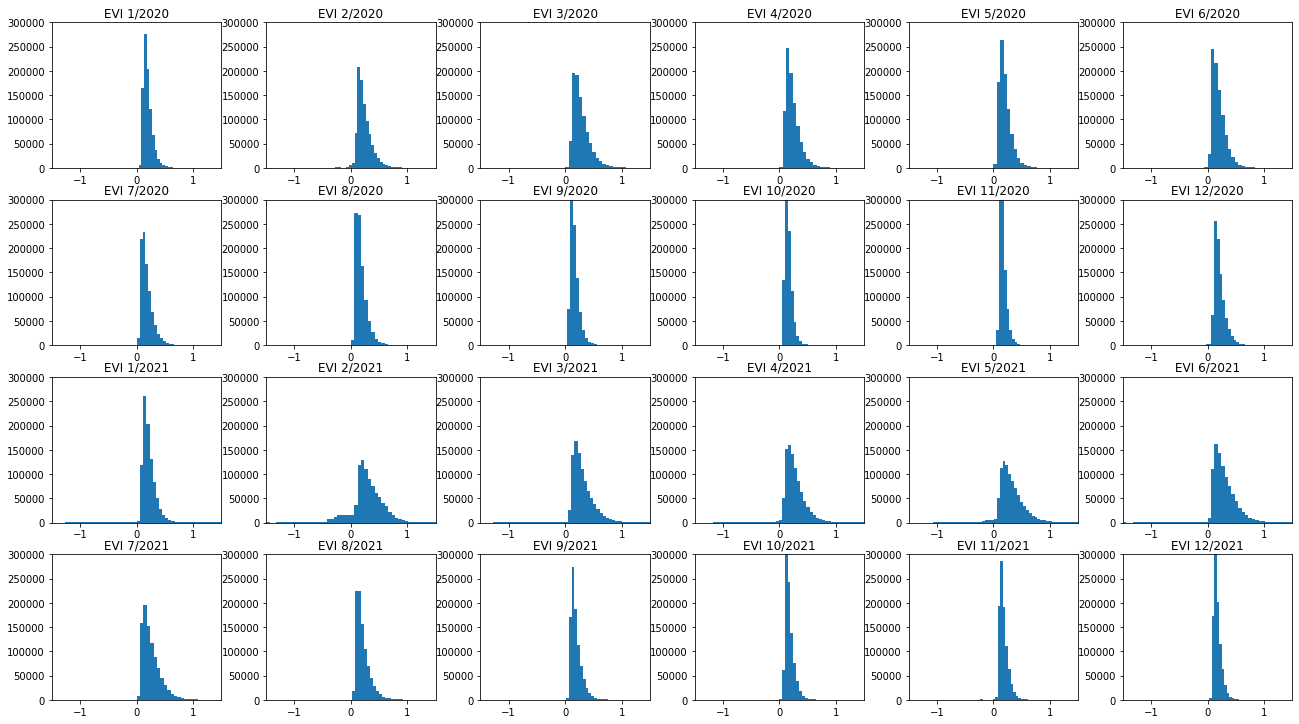

In [6]:
fig, ax = plt.subplots(4,6, figsize=(18,10))
plt.tight_layout()

i = 0

for f_truth_year in [2020, 2021]:
    for f_truth_month in range(1,13):

        blob_client = BlobServiceClient.from_connection_string(conn_str)
        container_client = blob_client.get_container_client("data")
        # blob_names = container_client.list_blobs(name_starts_with=f'{f_truth_year}/{int(f_truth_month):02d}/fused/{veg_type}_v1/')
        blob_names = container_client.list_blobs(name_starts_with=f'{f_truth_year}/{int(f_truth_month):02d}/staging/')

        truth_df = pd.DataFrame()
        for blob_name in blob_names:  ## to do random selection instead
            blob_client = get_blob_client(filename=blob_name, conn_str=conn_str)
            # df = pd.read_csv(StringIO(blob_client.download_blob().content_as_text()))
            # truth_df = truth_df.append(df)
            unpickled_ds = pkl.loads(blob_client.download_blob().content_as_bytes())
            unpickled_ds['evi'] = 2.5*((unpickled_ds.nbart_nir_1 - unpickled_ds.nbart_red) / (unpickled_ds.nbart_nir_1 + 6*unpickled_ds.nbart_red - 7.5*unpickled_ds.nbart_blue +1))
            da = xr.DataArray(coords={'y' : unpickled_ds['y'], 'x' : unpickled_ds['x']}, data=np.nanmean(unpickled_ds['evi'].values.clip(-1.5, 1.5), axis=0))
            da_df = da.to_dataframe(name='evi').dropna()
            da_df.reset_index(inplace=True)
            da_df.drop_duplicates(subset=['y','x'], keep='first', inplace=True)
            transformer = Transformer.from_crs("EPSG:3577", "EPSG:4326")
            y_4326, x_4326 = transformer.transform(da_df.x.values, da_df.y.values)
            da_df['lat'] = y_4326
            da_df['lon'] = x_4326
            da_df['filename'] = blob_name['name'].split('/')[3][:-7] + '.csv'
            da_df.drop(columns = ['y', 'x'], inplace=True)
            truth_df = truth_df.append(da_df)

        ax[i//6, i%6].hist(truth_df['evi'], bins=50)
        ax[i//6, i%6].set_title(f'EVI {f_truth_month}/{f_truth_year}')
        ax[i//6, i%6].set_xlim(-1.5, 1.5)
        ax[i//6, i%6].set_ylim(0,300000)
        print(str(f_truth_month) + ' ' + str(f_truth_year))
        i+=1
plt.show()

(-1.5, 1.5)

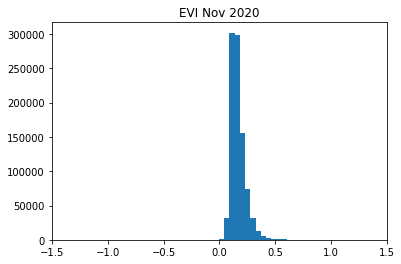

In [38]:
plt.hist(truth_df['evi'], bins=50)
plt.title('EVI Nov 2020')
plt.xlim(-1.5, 1.5)

Text(0.5, 1.0, 'EVI Feb 2021')

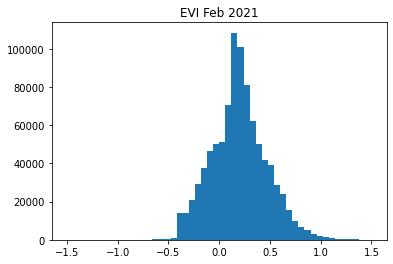

In [40]:
plt.hist(truth_df['evi'], bins=50)
plt.title('EVI Feb 2021')

/tmp/ipykernel_32137/271270037.py:33: RuntimeWarning: Mean of empty slice
  da = xr.DataArray(coords={'y' : unpickled_ds['y'], 'x' : unpickled_ds['x']}, data=np.nanmean(unpickled_ds['evi'].values.clip(-1.5, 1.5), axis=0))
/tmp/ipykernel_32137/271270037.py:33: RuntimeWarning: Mean of empty slice
  da = xr.DataArray(coords={'y' : unpickled_ds['y'], 'x' : unpickled_ds['x']}, data=np.nanmean(unpickled_ds['evi'].values.clip(-1.5, 1.5), axis=0))
/tmp/ipykernel_32137/271270037.py:33: RuntimeWarning: Mean of empty slice
  da = xr.DataArray(coords={'y' : unpickled_ds['y'], 'x' : unpickled_ds['x']}, data=np.nanmean(unpickled_ds['evi'].values.clip(-1.5, 1.5), axis=0))


---------
(62598, 8)
Acc: pv 3 months: 0.89
R2: pv 3 months: 0.68
---------
(203777, 8)
Acc: npv 3 months: 0.98
R2: npv 3 months: 0.59
---------
(619947, 8)
Acc: bs 3 months: 0.97
R2: bs 3 months: 0.53
---------
(48950, 8)
Acc: pv 6 months: 0.36
R2: pv 6 months: -0.65
---------
(184519, 8)
Acc: npv 6 months: 0.55
R2: npv 6 months: -0.29
---------
(536423, 8)
Acc: bs 6 months: 0.53
R2: bs 6 months: -0.40
---------
(60264, 8)
Acc: pv 12 months: 0.61
R2: pv 12 months: 0.31
---------
(203636, 8)
Acc: npv 12 months: 0.79
R2: npv 12 months: 0.36
---------
(619321, 8)
Acc: bs 12 months: 0.84
R2: bs 12 months: 0.55


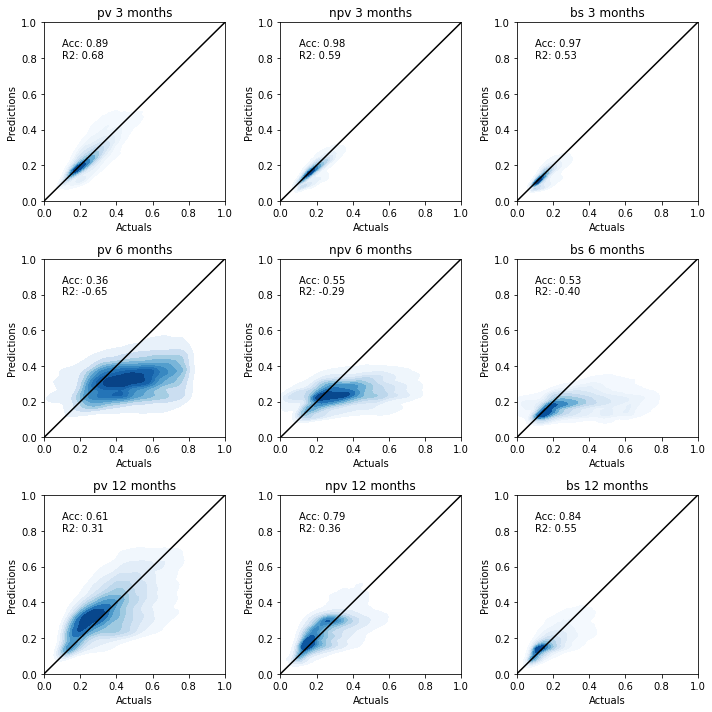

In [5]:
random_select = 16000
veg_type = 'pv'
f_year = '2020'
f_prev_month = '08'

fig, ax = plt.subplots(3,3, figsize=(10,10))

i=0
for month_model in [3,6,12]:
    # for veg_type in ['pv']:
    if month_model == 3:
        f_truth_month = 11  # to delta
        f_truth_year = 2020 # to delta
    if month_model == 6:
        f_truth_month = 2  # to delta
        f_truth_year = 2021
    if month_model == 12:
        f_truth_month = 8  # to delta
        f_truth_year = 2021

    blob_client = BlobServiceClient.from_connection_string(conn_str)
    container_client = blob_client.get_container_client("data")
    # blob_names = container_client.list_blobs(name_starts_with=f'{f_truth_year}/{int(f_truth_month):02d}/fused/{veg_type}_v1/')
    blob_names = container_client.list_blobs(name_starts_with=f'{f_truth_year}/{int(f_truth_month):02d}/staging/')

    truth_df = pd.DataFrame()
    for blob_name in blob_names:  ## to do random selection instead
        blob_client = get_blob_client(filename=blob_name, conn_str=conn_str)
        # df = pd.read_csv(StringIO(blob_client.download_blob().content_as_text()))
        # truth_df = truth_df.append(df)
        unpickled_ds = pkl.loads(blob_client.download_blob().content_as_bytes())
        unpickled_ds['evi'] = 2.5*((unpickled_ds.nbart_nir_1 - unpickled_ds.nbart_red) / (unpickled_ds.nbart_nir_1 + 6*unpickled_ds.nbart_red - 7.5*unpickled_ds.nbart_blue +1))
        da = xr.DataArray(coords={'y' : unpickled_ds['y'], 'x' : unpickled_ds['x']}, data=np.nanmean(unpickled_ds['evi'].values.clip(-1.5, 1.5), axis=0))
        da_df = da.to_dataframe(name='evi').dropna()
        da_df.reset_index(inplace=True)
        da_df.drop_duplicates(subset=['y','x'], keep='first', inplace=True)
        transformer = Transformer.from_crs("EPSG:3577", "EPSG:4326")
        y_4326, x_4326 = transformer.transform(da_df.x.values, da_df.y.values)
        da_df['lat'] = y_4326
        da_df['lon'] = x_4326
        da_df['filename'] = blob_name['name'].split('/')[3][:-7] + '.csv'
        da_df.drop(columns = ['y', 'x'], inplace=True)
        truth_df = truth_df.append(da_df)

    for veg_type in ['pv', 'npv', 'bs']:
        last_col_name = f'pred_{month_model}mon'
        infer_csvfolder = f'scoringoutput_csv/{f_year}/{f_prev_month}/pred{month_model}_{veg_type}.csv'

        blob_client = get_blob_client(filename=infer_csvfolder, conn_str=conn_str)
        df_infer = pd.read_csv(StringIO(blob_client.download_blob().content_as_text()))

        # print(truth_df)

        # truth_df = truth_df[truth_df['filename'].str.startswith('YA')]

        # random_df_truth = truth_df.sample(n=random_select, replace=False)
        # random_df_truth_compare = random_df_truth.loc[:, ['filename', 'lat', 'lon', 'evi']]
        # df_infer_compare = df_infer.loc[:, ['chainage_name', 'latitude', 'longitude', last_col_name]]

        # df_infer_compare = df_infer_compare.rename(columns={'chainage_name':'filename', 'latitude':'lat', 'longitude':'lon'})
        # df_join_inner = random_df_truth_compare.merge(df_infer_compare, how='right', on=['filename','lat', 'lon'], indicator=True)
        # # print(df_join_inner)

        random_df_truth = truth_df   #.sample(n=random_select, replace=False)
        random_df_truth_compare = random_df_truth.loc[:, ['filename', 'lat', 'lon', 'evi']]
        df_infer_compare = df_infer.loc[:, ['chainage_name', 'latitude', 'longitude', last_col_name]]

        df_infer_compare.rename(columns={'chainage_name':'filename', 'latitude':'lat', 'longitude':'lon'}, inplace=True)
        df_infer_compare['lat'] = (df_infer_compare['lat']*1000000).astype('int')
        df_infer_compare['lon'] = (df_infer_compare['lon']*1000000).astype('int')

        random_df_truth_compare['lat'] = (random_df_truth_compare['lat']*1000000).astype('int')
        random_df_truth_compare['lon'] = (random_df_truth_compare['lon']*1000000).astype('int')
                
        df_join_inner = pd.merge(left=random_df_truth_compare, 
                                    right=df_infer_compare, how='inner', 
                                                    left_on=['filename','lat', 'lon'], 
                                                    right_on = ['filename','lat', 'lon'], 
                                                    copy=True, indicator=True,
                                                    suffixes=('_truth', '_infer'))

        # df_join_inner = df_join_inner[~df_join_inner['filename'].str.startswith('YA')]
        df_join_inner_clean = df_join_inner.dropna()
        # print(df_join_inner_clean)

        print('---------')
        ### Bin EVI values into 4 bands to mimic PCI
        # bins = [0, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.55, 0.6]
        bins = [0, 0.2, 0.4, 0.6, 0.8]  

        names2 = list(range(len(bins)-1))
        df_join_inner_clean['pred_band'] = pd.cut(df_join_inner_clean[last_col_name], bins, labels=names2)
        df_join_inner_clean['actual_band'] = pd.cut(df_join_inner_clean['evi'], bins, labels=names2)

        # print(df_join_inner_clean)
        df_join_inner_clean = df_join_inner_clean.dropna()
        print(df_join_inner_clean.shape)

        y_pred = df_join_inner_clean['pred_band'].astype('int')
        y_true = df_join_inner_clean['actual_band'].astype('int')
        # cond = y_pred['pred_band'] > 0
        # acc =  accuracy_score(y_true[cond], y_pred[cond])
        cond = (y_pred > 0) & (y_true > 0)
        acc =  accuracy_score(y_true[cond], y_pred[cond])
        print("Acc: " + veg_type + " " + str(month_model) + " months: " + f'{acc:.2f}')

        r2 = r2_score(df_join_inner_clean['evi'], df_join_inner_clean[last_col_name])
        print("R2: "  + veg_type + " " + str(month_model) + " months: " +  f'{r2:.2f}')

        # ax[i//3, i%3].scatter(df_join_inner['evi'], df_join_inner[f'pred_{month_model}mon'], s=2)
        sns.kdeplot(x='evi', y=last_col_name, data=df_join_inner_clean,
                     cmap="Blues", shade=True,
                     ax=ax[i//3, i%3])
        # filt = df_join_inner_clean['filename'].str.startswith('YA')
        # ax[i//3, i%3].scatter(df_join_inner_clean[filt]['evi'], df_join_inner_clean[filt][last_col_name], s=0.1, c='hotpink', alpha=0.5)
        # ax[i//3, i%3].scatter(df_join_inner_clean['evi'], df_join_inner_clean[last_col_name], s=0.5, c='hotpink')

        ax[i//3, i%3].plot([0, 1.], [0, 1.], c='black')
        ax[i//3, i%3].text(x=0.1, y=0.8, s=f"Acc: {acc:.2f}\nR2: {r2:.2f}")
        ax[i//3, i%3].set_xlabel("Actuals")
        ax[i//3, i%3].set_ylabel("Predictions")
        ax[i//3, i%3].set_xlim(0, 1.)
        ax[i//3, i%3].set_ylim(0, 1.)
        ax[i//3, i%3].set_title(veg_type + " " + str(month_model) + " months")
        i+=1

plt.tight_layout()
plt.show()

/tmp/ipykernel_32137/4068921448.py:33: RuntimeWarning: Mean of empty slice
  da = xr.DataArray(coords={'y' : unpickled_ds['y'], 'x' : unpickled_ds['x']}, data=np.nanmean(unpickled_ds['evi'].values.clip(-1.5, 1.5), axis=0))
/tmp/ipykernel_32137/4068921448.py:33: RuntimeWarning: Mean of empty slice
  da = xr.DataArray(coords={'y' : unpickled_ds['y'], 'x' : unpickled_ds['x']}, data=np.nanmean(unpickled_ds['evi'].values.clip(-1.5, 1.5), axis=0))
/tmp/ipykernel_32137/4068921448.py:33: RuntimeWarning: Mean of empty slice
  da = xr.DataArray(coords={'y' : unpickled_ds['y'], 'x' : unpickled_ds['x']}, data=np.nanmean(unpickled_ds['evi'].values.clip(-1.5, 1.5), axis=0))


---------
(56012, 8)
Acc: pv 3 months: 0.55
R2: pv 3 months: 0.36
---------
(201776, 8)
Acc: npv 3 months: 0.70
R2: npv 3 months: 0.34
---------
(627564, 8)
Acc: bs 3 months: 0.77
R2: bs 3 months: 0.49
---------
(56644, 8)
Acc: pv 6 months: 0.55
R2: pv 6 months: 0.30
---------
(202529, 8)
Acc: npv 6 months: 0.62
R2: npv 6 months: 0.15
---------
(631437, 8)
Acc: bs 6 months: 0.70
R2: bs 6 months: 0.34
---------
(61085, 8)
Acc: pv 12 months: 0.22
R2: pv 12 months: -3.43
---------
(204079, 8)
Acc: npv 12 months: 0.30
R2: npv 12 months: -5.13
---------
(633453, 8)
Acc: bs 12 months: 0.65
R2: bs 12 months: -1.70


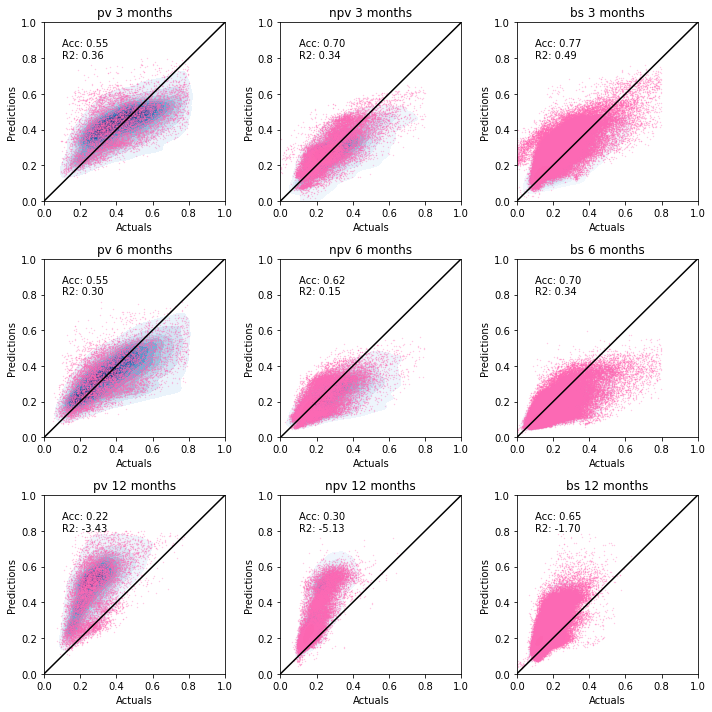

In [9]:
random_select = 16000
veg_type = 'pv'
f_year = '2021'
f_prev_month = '01'

fig, ax = plt.subplots(3,3, figsize=(10,10))

i=0
for month_model in [3,6,12]:
    # for veg_type in ['pv']:
    if month_model == 3:
        f_truth_month = 4  # to delta
        f_truth_year = 2021 # to delta
    if month_model == 6:
        f_truth_month = 7  # to delta
        f_truth_year = 2021
    if month_model == 12:
        f_truth_month = 1  # to delta
        f_truth_year = 2022

    blob_client = BlobServiceClient.from_connection_string(conn_str)
    container_client = blob_client.get_container_client("data")
    # blob_names = container_client.list_blobs(name_starts_with=f'{f_truth_year}/{int(f_truth_month):02d}/fused/{veg_type}_v1/')
    blob_names = container_client.list_blobs(name_starts_with=f'{f_truth_year}/{int(f_truth_month):02d}/staging/')

    truth_df = pd.DataFrame()
    for blob_name in blob_names:  ## to do random selection instead
        blob_client = get_blob_client(filename=blob_name, conn_str=conn_str)
        # df = pd.read_csv(StringIO(blob_client.download_blob().content_as_text()))
        # truth_df = truth_df.append(df)
        unpickled_ds = pkl.loads(blob_client.download_blob().content_as_bytes())
        unpickled_ds['evi'] = 2.5*((unpickled_ds.nbart_nir_1 - unpickled_ds.nbart_red) / (unpickled_ds.nbart_nir_1 + 6*unpickled_ds.nbart_red - 7.5*unpickled_ds.nbart_blue +1))
        da = xr.DataArray(coords={'y' : unpickled_ds['y'], 'x' : unpickled_ds['x']}, data=np.nanmean(unpickled_ds['evi'].values.clip(-1.5, 1.5), axis=0))
        da_df = da.to_dataframe(name='evi').dropna()
        da_df.reset_index(inplace=True)
        da_df.drop_duplicates(subset=['y','x'], keep='first', inplace=True)
        transformer = Transformer.from_crs("EPSG:3577", "EPSG:4326")
        y_4326, x_4326 = transformer.transform(da_df.x.values, da_df.y.values)
        da_df['lat'] = y_4326
        da_df['lon'] = x_4326
        da_df['filename'] = blob_name['name'].split('/')[3][:-7] + '.csv'
        da_df.drop(columns = ['y', 'x'], inplace=True)
        truth_df = truth_df.append(da_df)

    for veg_type in ['pv', 'npv', 'bs']:
        last_col_name = f'pred_{month_model}mon'
        infer_csvfolder = f'scoringoutput_csv/{f_year}/{f_prev_month}/pred{month_model}_{veg_type}.csv'

        blob_client = get_blob_client(filename=infer_csvfolder, conn_str=conn_str)
        df_infer = pd.read_csv(StringIO(blob_client.download_blob().content_as_text()))

        # print(truth_df)

        # truth_df = truth_df[truth_df['filename'].str.startswith('YA')]

        # random_df_truth = truth_df.sample(n=random_select, replace=False)
        # random_df_truth_compare = random_df_truth.loc[:, ['filename', 'lat', 'lon', 'evi']]
        # df_infer_compare = df_infer.loc[:, ['chainage_name', 'latitude', 'longitude', last_col_name]]

        # df_infer_compare = df_infer_compare.rename(columns={'chainage_name':'filename', 'latitude':'lat', 'longitude':'lon'})
        # df_join_inner = random_df_truth_compare.merge(df_infer_compare, how='right', on=['filename','lat', 'lon'], indicator=True)
        # # print(df_join_inner)

        random_df_truth = truth_df   #.sample(n=random_select, replace=False)
        random_df_truth_compare = random_df_truth.loc[:, ['filename', 'lat', 'lon', 'evi']]
        df_infer_compare = df_infer.loc[:, ['chainage_name', 'latitude', 'longitude', last_col_name]]

        df_infer_compare.rename(columns={'chainage_name':'filename', 'latitude':'lat', 'longitude':'lon'}, inplace=True)
        df_infer_compare['lat'] = (df_infer_compare['lat']*1000000).astype('int')
        df_infer_compare['lon'] = (df_infer_compare['lon']*1000000).astype('int')

        random_df_truth_compare['lat'] = (random_df_truth_compare['lat']*1000000).astype('int')
        random_df_truth_compare['lon'] = (random_df_truth_compare['lon']*1000000).astype('int')
                
        df_join_inner = pd.merge(left=random_df_truth_compare, 
                                    right=df_infer_compare, how='inner', 
                                                    left_on=['filename','lat', 'lon'], 
                                                    right_on = ['filename','lat', 'lon'], 
                                                    copy=True, indicator=True,
                                                    suffixes=('_truth', '_infer'))

        # df_join_inner = df_join_inner[~df_join_inner['filename'].str.startswith('YA')]
        df_join_inner_clean = df_join_inner.dropna()
        # print(df_join_inner_clean)

        print('---------')
        ### Bin EVI values into 4 bands to mimic PCI
        # bins = [0, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.55, 0.6]
        bins = [0, 0.2, 0.4, 0.6, 0.8]  

        names2 = list(range(len(bins)-1))
        df_join_inner_clean['pred_band'] = pd.cut(df_join_inner_clean[last_col_name], bins, labels=names2)
        df_join_inner_clean['actual_band'] = pd.cut(df_join_inner_clean['evi'], bins, labels=names2)

        # print(df_join_inner_clean)
        df_join_inner_clean = df_join_inner_clean.dropna()
        print(df_join_inner_clean.shape)

        y_pred = df_join_inner_clean['pred_band'].astype('int')
        y_true = df_join_inner_clean['actual_band'].astype('int')
        # cond = y_pred['pred_band'] > 0
        # acc =  accuracy_score(y_true[cond], y_pred[cond])
        cond = (y_pred > 0) & (y_true > 0)
        acc =  accuracy_score(y_true[cond], y_pred[cond])
        print("Acc: " + veg_type + " " + str(month_model) + " months: " + f'{acc:.2f}')

        r2 = r2_score(df_join_inner_clean['evi'], df_join_inner_clean[last_col_name])
        print("R2: "  + veg_type + " " + str(month_model) + " months: " +  f'{r2:.2f}')

        # ax[i//3, i%3].scatter(df_join_inner['evi'], df_join_inner[f'pred_{month_model}mon'], s=2)
        sns.kdeplot(x='evi', y=last_col_name, data=df_join_inner_clean,
                     cmap="Blues", shade=True,
                     ax=ax[i//3, i%3])
        filt = df_join_inner_clean['filename'].str.startswith('YA')
        ax[i//3, i%3].scatter(df_join_inner_clean[filt]['evi'], df_join_inner_clean[filt][last_col_name], s=0.1, c='hotpink', alpha=0.5)
        # ax[i//3, i%3].scatter(df_join_inner_clean['evi'], df_join_inner_clean[last_col_name], s=0.5, c='hotpink')

        ax[i//3, i%3].plot([0, 1.], [0, 1.], c='black')
        ax[i//3, i%3].text(x=0.1, y=0.8, s=f"Acc: {acc:.2f}\nR2: {r2:.2f}")
        ax[i//3, i%3].set_xlabel("Actuals")
        ax[i//3, i%3].set_ylabel("Predictions")
        ax[i//3, i%3].set_xlim(0, 1.)
        ax[i//3, i%3].set_ylim(0, 1.)
        ax[i//3, i%3].set_title(veg_type + " " + str(month_model) + " months")
        i+=1

plt.tight_layout()
plt.show()

In [ ]:
# pv 3 months: 0.5531839893810333
# npv 3 months: 0.5621766092252563
# bs 3 months: 0.6267140115041288
# pv 6 months: 0.4662621270922428
# npv 6 months: 0.355464558050147
# bs 6 months: 0.3710929018146665


In [ ]:
filenc = 'era-mon-2015-2021.nc'
ds_env_all = xr.open_dataset(filenc)


In [ ]:
with open('nc_test.pkl','wb') as f:
    pkl.dump(ds_env_all, f)


In [37]:
### help resolve the weird pkl uploding
filep ='nc_test.pkl'
# filep ='2021-01.pkl'
with open(filep, 'rb') as f:
    ds_env = pkl.load(f)
    # ds_env = pkl.loads(filep)

In [35]:
help(scipy.io.netcdf)

Help on module scipy.io.netcdf in scipy.io:

NAME
    scipy.io.netcdf - NetCDF reader/writer module.

DESCRIPTION
    This module is used to read and create NetCDF files. NetCDF files are
    accessed through the `netcdf_file` object. Data written to and from NetCDF
    files are contained in `netcdf_variable` objects. Attributes are given
    as member variables of the `netcdf_file` and `netcdf_variable` objects.
    
    This module implements the Scientific.IO.NetCDF API to read and create
    NetCDF files. The same API is also used in the PyNIO and pynetcdf
    modules, allowing these modules to be used interchangeably when working
    with NetCDF files.
    
    Only NetCDF3 is supported here; for NetCDF4 see
    `netCDF4-python <http://unidata.github.io/netcdf4-python/>`__,
    which has a similar API.

CLASSES
    builtins.object
        netcdf_file
        netcdf_variable
    
    class netcdf_file(builtins.object)
     |  A file object for NetCDF data.
     |  
     |  A `netc